## 零知识证明前传-除子、双线性配对、Miller算法

在对扩域、扭转点、嵌入度、扭曲曲线这些概念有一个基本了解后，下面就要对除子、Wei配对、Tate配对、Miller算法做一个介绍，这是要进一步深入了解配对加密算法的大前提。

### 有限域r次单位根
设有限域$\mathbb F_{q}$，其中q是一个素数，$\overline {\mathbb F_{q}}$是其代数闭包，假定读者已经知道有限域的一些基本概念，也对扩域有些了解。现在定义$\overline {\mathbb F_{q}}$的r次单位根集合$$\mu_r=\{p | p^r = 1 \mod q , p \in \overline {\mathbb F_{q}} \}$$
给定r，把$\mathbb F_{q}$进行扩张到$\mathbb F_{q^k}$，如果k是最小的一个正整数，使得扩域$\mathbb F_{q^k}$刚好包括了所有的$\overline {\mathbb F_{q}}$的r次单位根，这个k也对应着我们在有限域椭圆曲线里的嵌入度。所以 $\mu_r \subset \mathbb F_{q^k}$。这个$\mu_r$有一些非常好的性质，首先它是一个循环子群，其次定义其生成元为g，则${(g^i)}^r = 1, \forall i \in 0..r-1 $，最后$x^r - 1 = \prod_{i=0}^{r-1}(x-g^i) $。<br>
在下面的Weil配对和Tate配对里，就会用到这个群作为配对计算的结果。


### 除子
除子这个概念非常抽象，研究其起源，已经严重超纲，大家可以参考知乎的讨论 https://www.zhihu.com/question/424040086/answer/1959581649?utm_id=0， 这里只给出在椭圆曲线下，形式化的定义为：$$ D = \sum_{P\in E(\overline {\mathbb F_q})} n_P(P) $$
需要注意的是，其定义只是一个形式上的和，跟椭圆曲线定义的加法完全不同的意思。关联除子和函数f，定义函数f的除子如下：$$(f)=\sum_{P\in E(\overline {\mathbb F_q})} ord_P(f)(P) $$
我们在零知识证明上下文里，比较关心的是直线函数，其一般和椭圆曲线有3个交点，P,Q,-(P+Q),所以其除子为 $$(f)=(P)+(Q)+(-(P+Q))-3(\mathcal O) $$
#### 例子1
以下例子来自于“pairing for beginners"文中的例子。
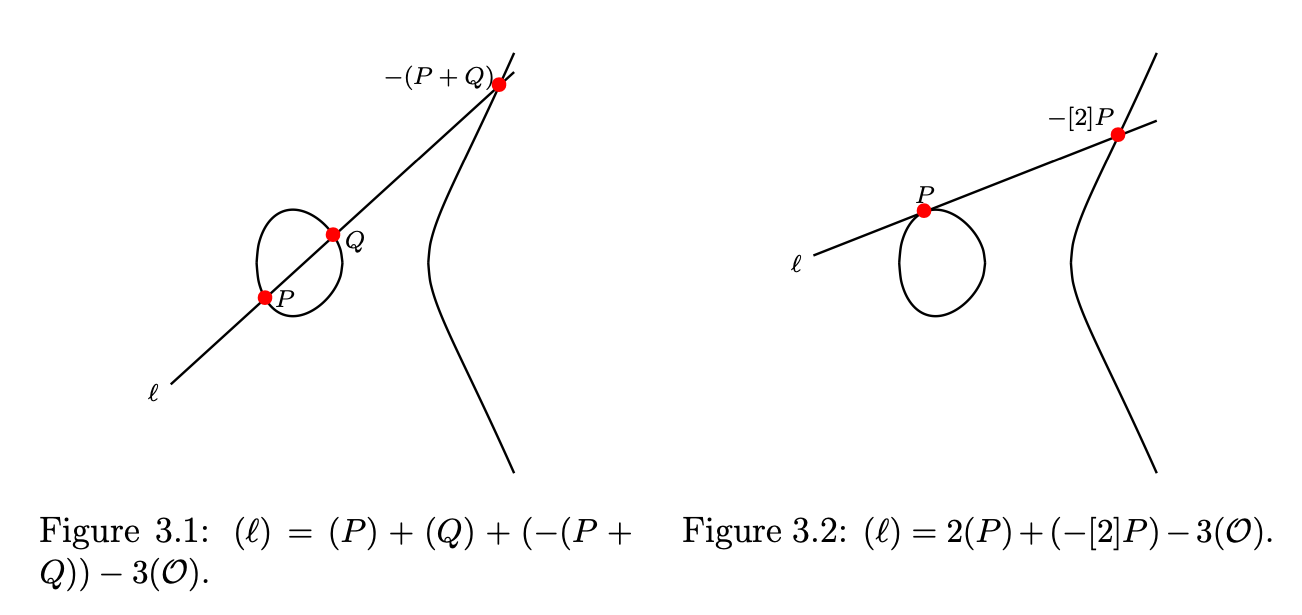

#### 性质
函数除子有非常好的性质：$$(fg) = (f)+(g) \\
(f/g) = (f)-(g) $$

#### 函数f在除子D上的取值
定义 $$ f(D) = \prod_{P \in E} f(P)^{n_P}, 其中f \in \mathbb F_q(E), D = \sum_{P\in E(\overline {\mathbb F_q})} n_P(P) $$

#### 例子2
以下例子同样来自于“pairing for beginners"文中的例子。设$E/\mathbb F_{163} : = y^2=x^3-x-2 $，P=(43,154),Q=(46,38),R=(12,35),S=(5,66)，直线$\mathcal l_{P,Q}：y+93x+85, \mathcal l_{P,P}：y+127x+90,\mathcal l_{Q,Q}：y+13x+16$ 分别为PQ直线、过P的切线、过Q的切线，定义除子$D_1 = 2(R)+(S), D_2=3(R)-3(S)$，可以计算
$$\mathcal l_{P,Q}(D_1) = (y_R + 93x_R + 85)^2(y_S + 93x_S + 85) = 122 \\
\mathcal l_{P,P}(D_2) = (y_R + 127x_R + 90)^3/(y_S + 127x_S + 90)^3 = 53  $$

#### Weil互换性
如果f,g是曲线E上的非零函数，$f((g))=g((f))$。
#### 例子3
以下例子同样来自于“pairing for beginners"文中。设$E/\mathbb F_{503} : y^2=x^3+1, f: \frac {20y+9x+179}{199y+187x+359} =0, g:y+251x^2+129x+201=0$ 则$(f)=2(433, 98) + (232, 113) − (432, 27) − 2(127, 258),(g) = (413, 369) + (339, 199) + (147, 443) + (124, 42) − 4(\mathcal O)$，计算$f((g))$如下：
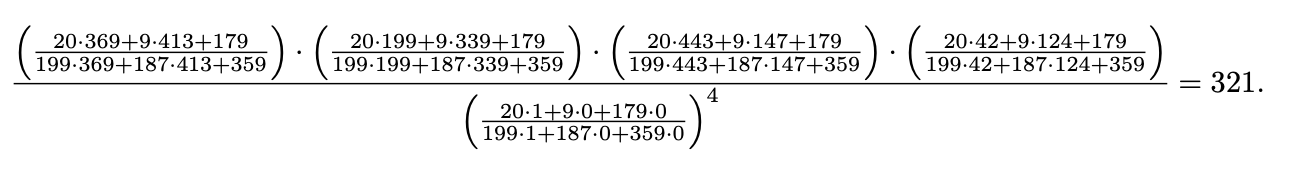
计算$g((f))$如下：
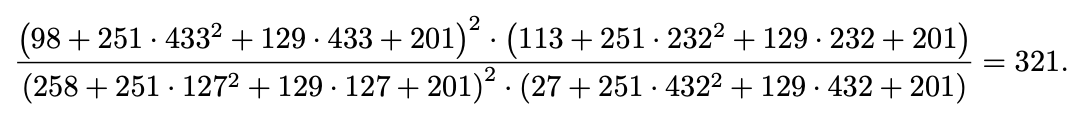
可以看到二者相等。

### 双线性配对
定义一个映射：$$ e: \mathbb G_1 \times \mathbb G_2 \rightarrow \mathbb G_T , G_1, G_2 \subset E(\mathbb F_{q^k}), \mathbb G_T \subset \mathbb F^*_{q^k} $$
其具备良好的双线性：$$ \forall a,b \in \mathbb Z, P,P' \in \mathbb G_1, Q,Q' \in \mathbb G_2 \\
e([a]P, [b]Q) = e(P, [b]Q)a = e([a]P, Q)b = e(P, Q)ab = e([b]P, [a]Q) \\
e(P + P ′, Q) = e(P, Q) · e(P ′, Q) \\
e(P, Q + Q′) = e(P, Q) · e(P, Q′)$$

#### 函数$f_{m,P}$ 和除子
定义$(f_{m,P} ) = m(P) − ([m]P) − (m − 1)(\mathcal O)$为E上任意一个点P的m阶函数除子，可见其是一个主除子，特别的如果P是一个r-阶扭转点，$(f_{r,P} ) = r(P) − r(\mathcal O)$，$(f_{m+1,P} ) -(f_{m,P} ) = (P) +([m]P) − ([m + 1]P) − (\mathcal O)$，而$(P) +([m]P) − ([m + 1]P) − (\mathcal O)$ 刚好是$l_{[m]P,P} /v_{[m+1]P}$，如下图所示：
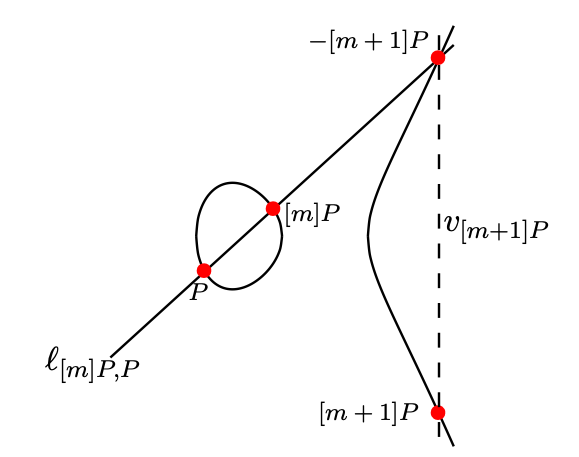
所以我们可以得到一个递归的表达式 $$(f_{m+1,P} ) = (f_{m,P} ) \cdot l_{[m]P,P} /v_{[m+1]P} $$

### Weil配对
有了前面知识的铺垫，weil配对的形式定义很简单：
$$ \mathcal w_r(P,Q) = \frac {f(D_Q)}{g(D_P)} ，P,Q \in E(\mathbb F_{q^k})[r] \\
(f) = rD_P, (g) = rD_Q $$
除子$D_P,D_Q$必须是不同的支撑集，$f(D_Q),g(D_P)$是函数f,g在除子的值。

#### 例子4
以下例子同样来自于“pairing for beginners"文中，设$$E/\mathbb F_{23} : y^2=x^3-x $$ 
$\#E(\mathbb F_q) = q+1=24$，设r=3，则嵌入度k=2，$P=(2,11), \mathbb F_{q^2}=\mathbb F_q[i]/<i^2+1>, Q=(21,12i)$，不难通过递归计算得到 $f_{r,P}=y+11x+13, f_{r,Q}=y+11ix+10i$，其分别有除子$(f_{r,P})=3(P)-3(\mathcal O), (f_{r,Q})=3(Q)-3(\mathcal O)$，直接计算weil配对结果是不行的，因为它们支撑集有交集$\mathcal O$，所以现在随机选取$R=(17i,2i+21),S=(10i+18,13i+13)$两个点，使得除子$D_P=(P+R)-(R),D_Q=(Q+S)-(S)$，分别与$(P)-(\mathcal O),(Q)-(\mathcal O)$相等，因此计算weil配对如下：
$$ \mathcal w_r(P,Q) = \frac {f(D_Q)}{g(D_P)} \\
=\frac {f(Q+S).g(R)}{f(S).g(P+R)} \\
=15i+11 $$
不难计算$(15i+11)^3 = 1$，因此其满足weil配对的要求

### Tate配对
weil配对在实际使用上没有Tate配对简便，Tate配对形式定义如下，可以看到其只用了一个除子作为参数：
$$ T_r: E(\mathbb F_{q^k})[r] \times E(\mathbb F_{q^k})/rE(\mathbb F_{q^k}) \rightarrow \mu_r \\
 T_r(P,Q) = f(D_Q)^{(q^k-1)/r} \\
 P \in E(\mathbb F_{q^k})[r], Q \in E(\mathbb F_{q^k})[r] 代表E(\mathbb F_{q^k})/rE(\mathbb F_{q^k}) \\
(f) = r(P)-r(\mathcal O) $$
其中除子$D_Q=(Q)-(\mathcal O)$要和$(f)$不同的支撑集，跟weil配对类似，都是随机选择一个R，让$D_Q=(Q+R)-(R)$

#### 例子5
以下例子同样来自于“pairing for beginners"文中，设$$E/\mathbb F_{19} : y^2=x^3+14x+3 $$ 
$\#E(\mathbb F_q) = q+1=20$，设r=5，则嵌入度k=2，$P=(19,9), \mathbb F_{q^2}=\mathbb F_q[i]/<i^2+1>, Q=(16,16i)$，容易验证P在基域$E(\mathbb F_q)$即所谓的$\mathbb G_1$上，Q的轨迹是$\mathcal O$，因此Q在所谓的$\mathbb G_2$上，跟例4类似，不难通过递归计算得到 $f_{r,P}$，然后计算得到$T_r(P,Q)=15i+2$，而$(15i+2)^5=1$，所以其满足Tate配对的要求。

### Miller算法
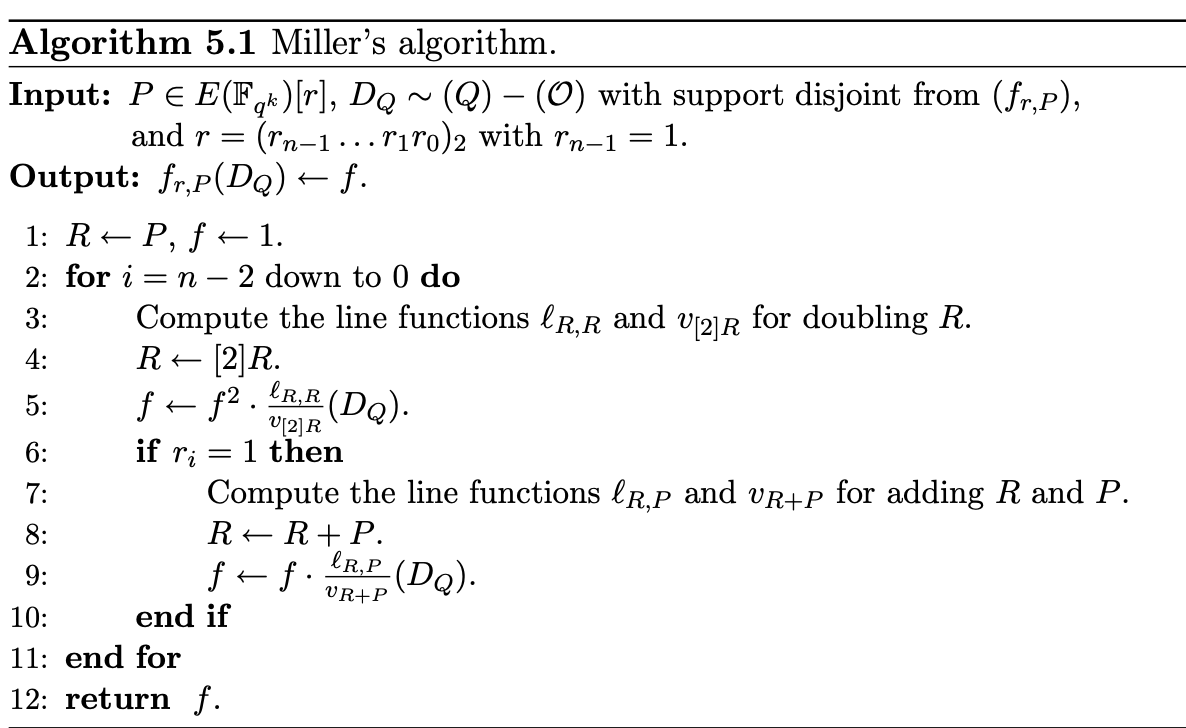

miller算法通过前面介绍的递归算法来推导$f_{r,P}(D_Q)$，具体就不展开了。

### 总结
双线性配对算法，要把两个椭圆曲线上的点$P,Q$映射到一个有限域$\mathbb F_q$上，需要借助除子这个工具。因为除子可以把两个点形式上关联起来，然后通过定义函数f在除子$D_P,D_Q$的取值，来实现配对计算的结果取值范围在$\mathbb F_q$上。